In [165]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import statsmodels.api as sm
from scipy import stats
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn import preprocessing

# Exploring the data 1b(i)

In [166]:
powerplant_data = pd.read_excel('powerplant.xlsx', sheet_name='Sheet1')
powerplant_data

,AT,V,AP,RH,PE
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90
5,26.27,59.44,1012.23,58.77,443.67
6,15.89,43.96,1014.02,75.24,467.35
7,9.48,44.71,1019.12,66.43,478.42
8,14.64,45.00,1021.78,41.25,475.98
9,11.74,43.56,1015.14,70.72,477.50


#### There are total 9568 rows and 5 columns. The first four columns represents features consist of hourly average ambient variables Temperature (AT), Ambient Pressure (AP), Relative Humidity (RH) and Exhaust Vacuum (V) and the last column represent response net hourly electrical energy output (PE). The rows represent the data values for each of the columns.

# Pairwise scatterplots of all the varianbles 1b(ii)

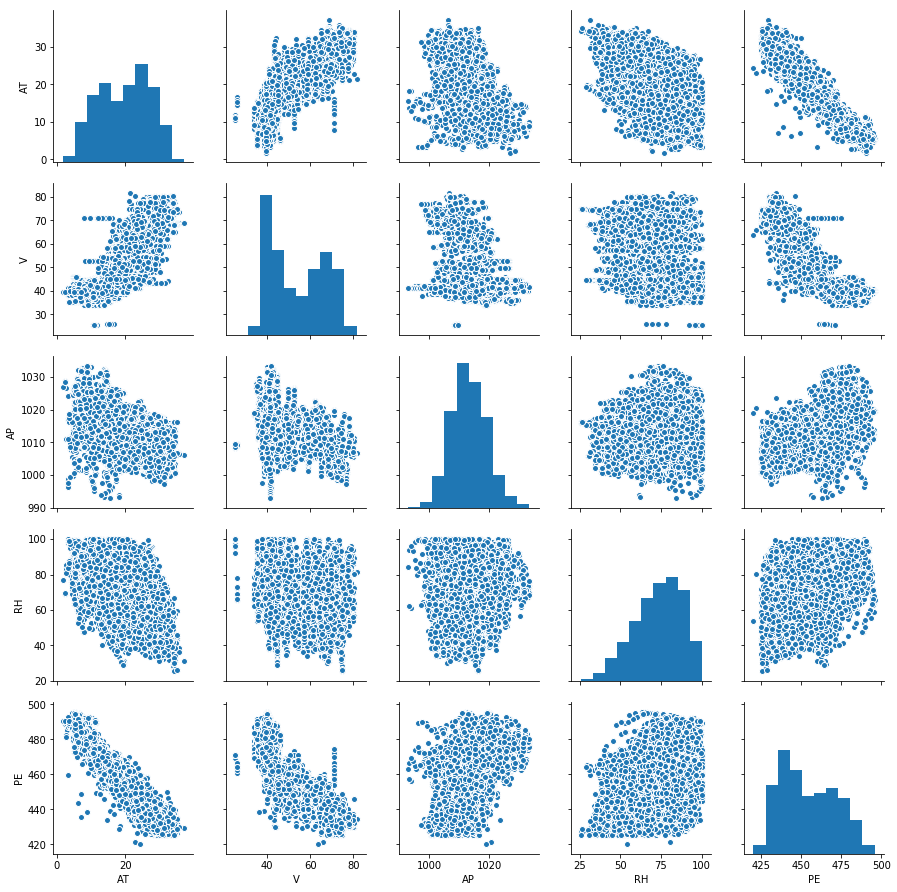

In [113]:
sns.pairplot(powerplant_data)

#### It can be inferred from the scatter plots that the feature AT and V have a significant linear relationship with the response variable. The features AP and RH are not that closely linearly related to the response.

# The mean, the median, range, first and third quartiles, and interquartile ranges 1b(iii)

In [187]:
response = powerplant_data.describe()
IQ = response.T['75%']- response.T['25%']
range = response.T['max'] - response.T['min']
response = response.append(pd.Series(IQ,name='interquartile'))
response.append(pd.Series(range,name='range'))

,AT,V,AP,RH,PE
count,9568.000000,9568.000000,9568.000000,9568.000000,9568.000000
mean,19.651231,54.305804,1013.259078,73.308978,454.365009
std,7.452473,12.707893,5.938784,14.600269,17.066995
min,1.810000,25.360000,992.890000,25.560000,420.260000
25%,13.510000,41.740000,1009.100000,63.327500,439.750000
50%,20.345000,52.080000,1012.940000,74.975000,451.550000
75%,25.720000,66.540000,1017.260000,84.830000,468.430000
max,37.110000,81.560000,1033.300000,100.160000,495.760000
interquartile,12.210000,24.800000,8.160000,21.502500,28.680000
range,35.300000,56.200000,40.410000,74.600000,75.500000


# Simple linear regression model for AT 1c

In [115]:
SLR_cofficient = []
X = powerplant_data['AT']
y = powerplant_data['PE']

X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())
SLR_cofficient.append(est2.params['AT'])

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.899
Model:                            OLS   Adj. R-squared:                  0.899
Method:                 Least Squares   F-statistic:                 8.510e+04
Date:                Mon, 24 Sep 2018   Prob (F-statistic):               0.00
Time:                        20:09:47   Log-Likelihood:                -29756.
No. Observations:                9568   AIC:                         5.952e+04
Df Residuals:                    9566   BIC:                         5.953e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        497.0341      0.156   3177.280      0.0

#### It can be infered that AT is a significant feature as the p-value for AT is less than 0.05. Below plot shows that  there is a statistically significant association between the AT predictor and the response.

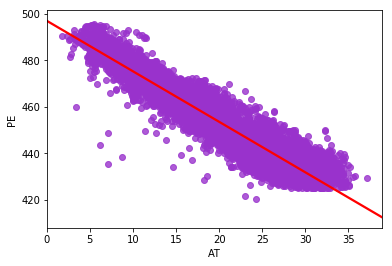

In [116]:
sns.regplot(x='AT', y='PE', data=powerplant_data, color='darkorchid', line_kws={'color':'red'})

# Simple linear regression model for V 1c

In [117]:
X = powerplant_data['V']
y = powerplant_data['PE']

X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())
SLR_cofficient.append(est2.params['V'])

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.757
Model:                            OLS   Adj. R-squared:                  0.756
Method:                 Least Squares   F-statistic:                 2.972e+04
Date:                Mon, 24 Sep 2018   Prob (F-statistic):               0.00
Time:                        20:09:49   Log-Likelihood:                -33963.
No. Observations:                9568   AIC:                         6.793e+04
Df Residuals:                    9566   BIC:                         6.794e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        517.8015      0.378   1370.218      0.0

#### It can be infered that AT is a significant feature as the p-value for V is less than 0.05. Below plot shows that there is a statistically significant association between the V predictor and the response.

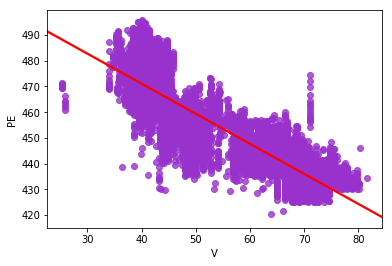

In [118]:
sns.regplot(x='V', y='PE', data=powerplant_data, color='darkorchid', line_kws={'color':'red'})

# Simple linear regression model for AP 1c

In [119]:
X = powerplant_data['AP']
y = powerplant_data['PE']

X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())
SLR_cofficient.append(est2.params['AP'])

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.269
Model:                            OLS   Adj. R-squared:                  0.269
Method:                 Least Squares   F-statistic:                     3516.
Date:                Mon, 24 Sep 2018   Prob (F-statistic):               0.00
Time:                        20:09:51   Log-Likelihood:                -39224.
No. Observations:                9568   AIC:                         7.845e+04
Df Residuals:                    9566   BIC:                         7.847e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1055.2610     25.459    -41.449      0.0

#### It can be infered that AP is a significant feature as the p-value for AT is less than 0.05. Below plot shows that there is a statistically significant association between the AP predictor and the response.

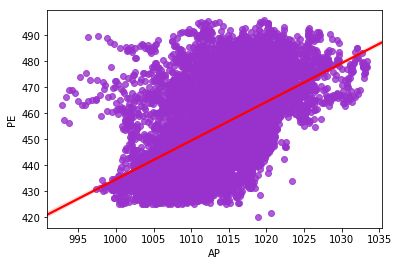

In [120]:
sns.regplot(x='AP', y='PE', data=powerplant_data, color='darkorchid', line_kws={'color':'red'})

# Simple linear regression model for RH 1c

In [121]:
X = powerplant_data['RH']
y = powerplant_data['PE']

X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())
SLR_cofficient.append(est2.params['RH'])

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.152
Model:                            OLS   Adj. R-squared:                  0.152
Method:                 Least Squares   F-statistic:                     1714.
Date:                Mon, 24 Sep 2018   Prob (F-statistic):               0.00
Time:                        20:09:53   Log-Likelihood:                -39933.
No. Observations:                9568   AIC:                         7.987e+04
Df Residuals:                    9566   BIC:                         7.988e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        420.9618      0.823    511.676      0.0

#### It can be infered that AP is a significant feature as the p-value for AT is less than 0.05. Below plot shows that there is a statistically significant association between the AP predictor and the response.

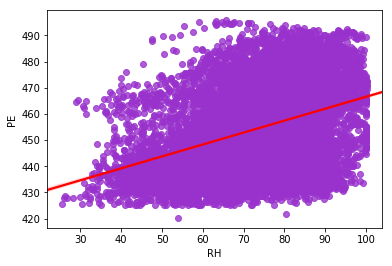

In [122]:
sns.regplot(x='RH', y='PE', data=powerplant_data, color='darkorchid', line_kws={'color':'red'})

# Finding Outliers as per 1c

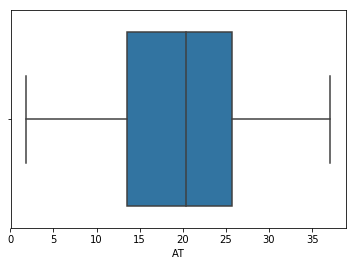

In [123]:
sns.boxplot(x=powerplant_data['AT'])

#### It can be inferred from the above box-plot that there are no outliers for predictor AT

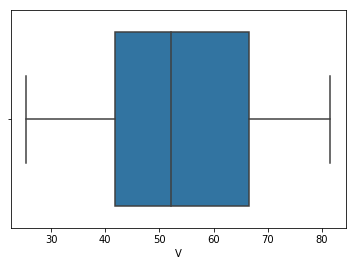

In [124]:
sns.boxplot(x=powerplant_data['V'])

#### It can be inferred from the above box-plot that there are no outliers for predictor V.

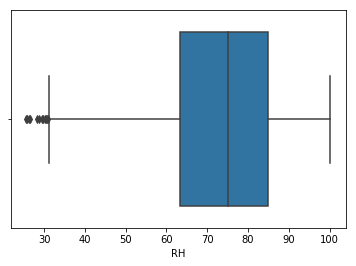

In [125]:
sns.boxplot(x=powerplant_data['RH'])

#### Seeing the above box-plot it can be inferred that there are outliers for predictor RH. Outliers are the values less than 30.

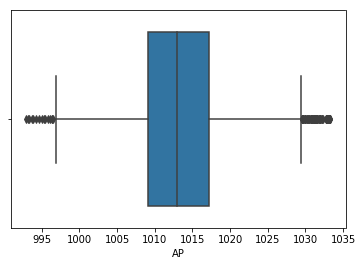

In [126]:
sns.boxplot(x=powerplant_data['AP'])

#### Seeing the above box-plot it can be inferred that there are outliers for predictor AP. Outliers are the values less than 997 and greater than 1030.

# Multiple regression model to predict the response as per 1d

In [127]:
MLR_cofficient = []
X = powerplant_data[['AT', 'V', 'AP', 'RH']]
y = powerplant_data['PE']

X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())
MLR_cofficient.append(est2.params['AT'])
MLR_cofficient.append(est2.params['V'])
MLR_cofficient.append(est2.params['AP'])
MLR_cofficient.append(est2.params['RH'])

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.929
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                 3.114e+04
Date:                Mon, 24 Sep 2018   Prob (F-statistic):               0.00
Time:                        20:09:56   Log-Likelihood:                -28088.
No. Observations:                9568   AIC:                         5.619e+04
Df Residuals:                    9563   BIC:                         5.622e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        454.6093      9.749     46.634      0.0

#### From the data above it can be noted that the p-values for all the predictor is less than 0.05 and therefore for all the predictors null hypothesis can be rejected.

In [128]:
print(MLR_cofficient)
print(SLR_cofficient)

[-1.9775131066353948, -0.233916422582498, 0.06208294378085294, -0.15805410291641797]
[-2.171319958517798, -1.1681351265557098, 1.489871673399116, 0.45565010226298147]


# A plot displaying the univariate regression coefficients from 1c on the x-axis, and the multiple regression coefficients from 1d on the y-axis as per 1e

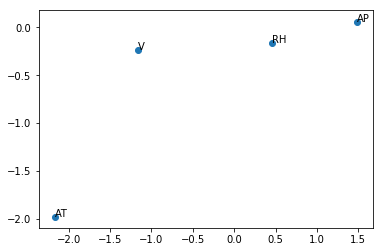

In [129]:
y = MLR_cofficient
x = SLR_cofficient
n = ['AT', 'V', 'AP', 'RH']

fig, ax = plt.subplots()
ax.scatter(x, y)

for i, txt in enumerate(n):
    ax.annotate(txt, (x[i], y[i]))

# Polynomial Regression for AT as per 1f

In [188]:
X = powerplant_data[['AT']]
poly_reg = PolynomialFeatures(degree=3)
X_poly = poly_reg.fit_transform(X)
X_poly = pd.DataFrame(X_poly, columns = ["AT0", "AT1", "AT2", "AT3"])

In [131]:
X = X_poly
y = powerplant_data['PE']

est = sm.OLS(y, X)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.912
Model:                            OLS   Adj. R-squared:                  0.912
Method:                 Least Squares   F-statistic:                 3.299e+04
Date:                Mon, 24 Sep 2018   Prob (F-statistic):               0.00
Time:                        20:09:56   Log-Likelihood:                -29101.
No. Observations:                9568   AIC:                         5.821e+04
Df Residuals:                    9564   BIC:                         5.824e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
AT0          492.7281      0.673    732.248      0.0

#### All features are significant therefore there is a evidence of nonlinear association.

# Polynomial Regression for V as per 1f

In [189]:
X = powerplant_data[['V']]
poly_reg = PolynomialFeatures(degree=3)
X_poly = poly_reg.fit_transform(X)
X_poly = pd.DataFrame(X_poly, columns = ["V0", "V1", "V2", "V3"])

In [133]:
X = X_poly
y = powerplant_data['PE']

est = sm.OLS(y, X)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.775
Model:                            OLS   Adj. R-squared:                  0.775
Method:                 Least Squares   F-statistic:                 1.098e+04
Date:                Mon, 24 Sep 2018   Prob (F-statistic):               0.00
Time:                        20:09:56   Log-Likelihood:                -33585.
No. Observations:                9568   AIC:                         6.718e+04
Df Residuals:                    9564   BIC:                         6.721e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
V0           554.1468      9.151     60.557      0.0

#### Since V3 is significant therefore there is a evidence of nonlinear association.

# Polynomial Regression for AP as per 1f

In [190]:
X = powerplant_data[['AP']]
poly_reg = PolynomialFeatures(degree=3)
X_poly = poly_reg.fit_transform(X)
X_poly = pd.DataFrame(X_poly, columns = ["AP0", "AP1", "AP2", "AP3"])

In [135]:
X = X_poly
y = powerplant_data['PE']

est = sm.OLS(y, X)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.275
Model:                            OLS   Adj. R-squared:                  0.275
Method:                 Least Squares   F-statistic:                     1813.
Date:                Mon, 24 Sep 2018   Prob (F-statistic):               0.00
Time:                        20:09:56   Log-Likelihood:                -39184.
No. Observations:                9568   AIC:                         7.837e+04
Df Residuals:                    9565   BIC:                         7.840e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
AP0            0.0747      0.009      8.415      0.0

#### All features are significant therefore there is a evidence of nonlinear association.

# Polynomial Regression for RH as per 1f

In [191]:
X = powerplant_data[['RH']]
poly_reg = PolynomialFeatures(degree=3)
X_poly = poly_reg.fit_transform(X)
X_poly = pd.DataFrame(X_poly, columns = ["RH0", "RH1", "RH2", "RH3"])

In [137]:
X = X_poly
y = powerplant_data['PE']

est = sm.OLS(y, X)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.154
Model:                            OLS   Adj. R-squared:                  0.153
Method:                 Least Squares   F-statistic:                     579.2
Date:                Mon, 24 Sep 2018   Prob (F-statistic):               0.00
Time:                        20:09:56   Log-Likelihood:                -39923.
No. Observations:                9568   AIC:                         7.985e+04
Df Residuals:                    9564   BIC:                         7.988e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
RH0          468.4135     10.545     44.422      0.0

#### All features are significant therefore there is a evidence of nonlinear association.

# Full linear regression model with all pairwise interaction terms as per 1g


In [192]:
X = powerplant_data[['AT', 'V', 'AP', 'RH']]
poly_reg = PolynomialFeatures(interaction_only=True)
X_poly = poly_reg.fit_transform(X)
X_poly = pd.DataFrame(X_poly, columns = ['Coff','AT', 'V', 'AP', 'RH', 'AT*V', 'AT*AP', 'AT*RH', 'V*AP', 'V*RH', 'AP*RH'])

In [139]:
X = X_poly
y = powerplant_data['PE']

est = sm.OLS(y, X)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.936
Model:                            OLS   Adj. R-squared:                  0.936
Method:                 Least Squares   F-statistic:                 1.405e+04
Date:                Mon, 24 Sep 2018   Prob (F-statistic):               0.00
Time:                        20:09:56   Log-Likelihood:                -27548.
No. Observations:                9568   AIC:                         5.512e+04
Df Residuals:                    9557   BIC:                         5.520e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Coff         685.7825     78.640      8.721      0.0

#### All features are significant except AT, V*RH and AT*AP as there p-values are greater than 0.05. 

# Multiple linear regression model on a randomly selected 70% subset of the data with all predictors as per 1h

In [193]:
X_train, X_test, y_train, y_test = train_test_split(powerplant_data[['AT', 'V', 'AP', 'RH']], powerplant_data['PE'], test_size=0.3, random_state=1)

X_train.reset_index(drop=True,inplace=True)
X_test.reset_index(drop=True,inplace=True)

y_train.reset_index(drop=True,inplace=True)
y_test.reset_index(drop=True,inplace=True)

In [178]:
lm2 = LinearRegression()
lm2.fit(X_train, y_train)
pred_train = lm2.predict(X_train)
pred_test = lm2.predict(X_test)

MLR_test_error = mean_squared_error(y_test, pred_test)
MLR_train_error = mean_squared_error(y_train, pred_train)
print("Multiple Linear Regression test MSE: " + str(MLR_test_error))
print("Multiple Linear Regression train MSE: " + str(MLR_train_error))


Multiple Linear Regression test MSE: 20.777478106884395
Multiple Linear Regression train MSE: 20.766119761450934


#  Regression model involving all possible interaction terms and quadratic nonlinearities, and removing insignificant variables using p-values as per 1h

In [141]:
X = powerplant_data[['AT', 'V', 'AP', 'RH']]
poly_reg = PolynomialFeatures(degree=2, interaction_only=False)
X_poly = poly_reg.fit_transform(X)
X_poly = pd.DataFrame(X_poly, columns = ['Coff','AT', 'V', 'AP', 'RH', 'AT2', 'AT*V', 'AT*AP', 'AT*RH', 'V2', 'V*AP', 'V*RH', 'AP2', 'AP*RH', 'RH2'])
X_poly['PE'] = powerplant_data['PE']

,Coff,AT,V,AP,RH,AT2,AT*V,AT*AP,AT*RH,V2,V*AP,V*RH,AP2,AP*RH,RH2,PE
0,1.0,14.96,41.76,1024.07,73.17,223.8016,624.7296,15320.0872,1094.6232,1743.8976,42765.1632,3055.5792,1.048719e+06,74931.2019,5353.8489,463.26
1,1.0,25.18,62.96,1020.04,59.08,634.0324,1585.3328,25684.6072,1487.6344,3963.9616,64221.7184,3719.6768,1.040482e+06,60263.9632,3490.4464,444.37
2,1.0,5.11,39.40,1012.16,92.14,26.1121,201.3340,5172.1376,470.8354,1552.3600,39879.1040,3630.3160,1.024468e+06,93260.4224,8489.7796,488.56
3,1.0,20.86,57.32,1010.24,76.64,435.1396,1195.6952,21073.6064,1598.7104,3285.5824,57906.9568,4393.0048,1.020585e+06,77424.7936,5873.6896,446.48
4,1.0,10.82,37.50,1009.23,96.62,117.0724,405.7500,10919.8686,1045.4284,1406.2500,37846.1250,3623.2500,1.018545e+06,97511.8026,9335.4244,473.90
5,1.0,26.27,59.44,1012.23,58.77,690.1129,1561.4888,26591.2821,1543.8879,3533.1136,60166.9512,3493.2888,1.024610e+06,59488.7571,3453.9129,443.67
6,1.0,15.89,43.96,1014.02,75.24,252.4921,698.5244,16112.7778,1195.5636,1932.4816,44576.3192,3307.5504,1.028237e+06,76294.8648,5661.0576,467.35
7,1.0,9.48,44.71,1019.12,66.43,89.8704,423.8508,9661.2576,629.7564,1998.9841,45564.8552,2970.0853,1.038606e+06,67700.1416,4412.9449,478.42
8,1.0,14.64,45.00,1021.78,41.25,214.3296,658.8000,14958.8592,603.9000,2025.0000,45980.1000,1856.2500,1.044034e+06,42148.4250,1701.5625,475.98
9,1.0,11.74,43.56,1015.14,70.72,137.8276,511.3944,11917.7436,830.2528,1897.4736,44219.4984,3080.5632,1.030509e+06,71790.7008,5001.3184,477.50


In [171]:
cofficeint_array = ['Coff','AT', 'V', 'AP', 'RH', 'AT2', 'AT*V', 'AT*AP', 'AT*RH', 'V2', 'V*AP', 'V*RH', 'AP2', 'AP*RH', 'RH2']
efficient_model = False
insignificant_features = []
remaining_features = []
while(efficient_model != True):
    remaining_features = list(set(cofficeint_array) - set(insignificant_features))
    X_train, X_test, y_train, y_test = train_test_split(X_poly[remaining_features], X_poly['PE'], test_size=0.3, random_state=1)
    
    X_train.reset_index(drop=True,inplace=True)
    X_test.reset_index(drop=True,inplace=True)
    y_train.reset_index(drop=True,inplace=True)
    y_test.reset_index(drop=True,inplace=True)

    est = sm.OLS(y_train, X_train)
    est2 = est.fit()
    insini_features = [key for key,val in est2.pvalues.items() if val > 0.05]
    insini_features = list(set(insini_features) - set(['AT','V','AP','RH']))
    insignificant_features.extend(insini_features)
    if len(insini_features) == 0:
        efficient_model = True
        
efficient_features = remaining_features

X_train, X_test, y_train, y_test = train_test_split(X_poly[efficient_features], X_poly['PE'], test_size=0.3, random_state=1)

X_train.reset_index(drop=True,inplace=True)
X_test.reset_index(drop=True,inplace=True)
y_train.reset_index(drop=True,inplace=True)
y_test.reset_index(drop=True,inplace=True)


lm2 = LinearRegression()
lm2.fit(X_train, y_train)
pred_train = lm2.predict(X_train)
pred_test = lm2.predict(X_test)

FMLR_test_error = mean_squared_error(y_test, pred_test)
FMLR_train_error = mean_squared_error(y_train, pred_train)
print(FMLR_test_error)
print(FMLR_train_error) 

18.263588112268028
18.093235651112376


#### The test mse is reduced from 20.777478106884395 to 18.263588112268028 and the training mse is also reduced from 20.766119761450934 to 18.093235651112376. Therefore we can say that model is improved using possible interaction terms and quadratic associations between the predictors and response.

# KNN Regression with raw data as per 1i

In [160]:
X_train, X_test, y_train, y_test = train_test_split(powerplant_data[['AT', 'V', 'AP', 'RH']], powerplant_data[['PE']], test_size=0.3, random_state=1)

X_train.reset_index(drop=True,inplace=True)
X_test.reset_index(drop=True,inplace=True)

y_train.reset_index(drop=True,inplace=True)
y_test.reset_index(drop=True,inplace=True)

,AT,V,AP,RH
0,28.86,73.18,1012.46,68.80
1,20.96,69.48,1011.04,82.63
2,27.23,44.05,1005.69,58.91
3,25.37,66.75,1017.94,79.26
4,31.68,73.68,1014.85,64.00
5,20.47,63.07,1012.79,88.67
6,22.49,56.90,1007.65,63.34
7,23.19,58.82,1009.96,81.05
8,12.59,41.14,1025.79,86.55
9,25.79,59.43,1008.61,64.30


In [179]:
k = np.arange(1,101)
training_error = {}
test_error_array = []
training_error_array = []
test_error = {}
for i in k:    
    knn = KNeighborsRegressor(n_neighbors=i)
    knn.fit(X_train, y_train)
    
    pred_train = knn.predict(X_train)
    pred_test = knn.predict(X_test)

    KNN_test_error = mean_squared_error(y_test, pred_test)
    KNN_train_error = mean_squared_error(y_train, pred_train)
    
    test_error_array.append(KNN_test_error)
    training_error_array.append(KNN_train_error)
    test_error.update({i: KNN_test_error})
    training_error.update({i: KNN_train_error})

In [162]:
test_error_array = np.array(test_error_array)
training_error_array = np.array(training_error_array)

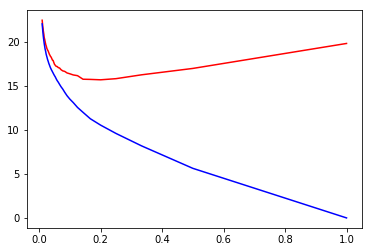

In [163]:
k = [(1/i) for i in range(1,101)]
plt.plot(k, test_error_array, color='red', markerfacecolor='blue')
plt.plot(k, training_error_array, color='blue', markerfacecolor='blue')

#### Blue plot is training error and red is testing error

In [164]:
optimal_k = [key for m in [min(test_error.values())] for key,val in test_error.items() if val == m][0]
print("Optimal k is " + str(optimal_k) + " for raw data and best MSE is " + str(test_error[optimal_k]))

Optimal k is 5 for raw data and best MSE is 15.704821203761764


# KNN Regression with normalized data as per 1i

In [183]:
norm_powerplant_data = preprocessing.normalize(powerplant_data, norm='l2')


norm_powerplant_data = pd.DataFrame(data=norm_powerplant_data[0:,0:], columns=['AT', 'V', 'AP', 'RH', 'PE'])

X_train, X_test, y_train, y_test = train_test_split(norm_powerplant_data[['AT', 'V', 'AP', 'RH']], norm_powerplant_data[['PE']], test_size=0.3, random_state=1)

X_train.reset_index(drop=True,inplace=True)
X_test.reset_index(drop=True,inplace=True)
y_train.reset_index(drop=True,inplace=True)
y_test.reset_index(drop=True,inplace=True)

In [180]:
k = np.arange(1,101)
training_error = {}
test_error_array = []
training_error_array = []
test_error = {}
for i in k:
    knn = KNeighborsRegressor(n_neighbors=i)
    knn.fit(X_train, y_train)
    
    pred_train = knn.predict(X_train)
    pred_test = knn.predict(X_test)

    KNN_test_error = mean_squared_error(y_test, pred_test)
    KNN_train_error = mean_squared_error(y_train, pred_train)

    test_error_array.append(KNN_test_error)
    training_error_array.append(KNN_train_error)
    test_error.update({i: KNN_test_error})
    training_error.update({i: KNN_train_error})

In [153]:
test_error_array = np.array(test_error_array)
training_error_array = np.array(training_error_array)

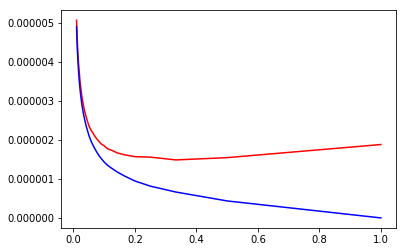

In [155]:
k = [(1/i) for i in range(1,101)]
plt.plot(k, test_error_array, color='red', markerfacecolor='blue')
plt.plot(k, training_error_array, color='blue', markerfacecolor='blue')

#### Blue plot is training error and red is testing error

In [158]:
optimal_k = [key for m in [min(test_error.values())] for key,val in test_error.items() if val == m][0]
print("Optimal k is " + str(optimal_k) + " for normalized data and best MSE is " + str(test_error[optimal_k]))

Optimal k is 3 for normalized data and best MSE is 1.4845598033673994e-06


# Comparing the results of KNN Regression with Linear Regression as per 1j

##### The test MSE for Multiple Linear regression with 70% training raw data and 30% testing raw data including all the predictors came out to be 20.777478106884395. Whereas the test MSE for KNN Regression with 70% training raw data and 30% testing raw data  including all the predictors came out to be 15.704821203761764 with optimal k as 3.

##### Based on this information it can be concluded that KNN Regression model is more optimal than Multiple Linear Regression model.

# ISLR: 2.4.1

1. For each of parts (a) through (d), indicate whether we would generally expect the performance of a flexible statistical learning method to be better or worse than an inflexible method. Justify your answer.

(a) The sample size n is extremely large, and the number of predic- tors p is small.

(b) The number of predictors p is extremely large, and the number of observations n is small.

(c) The relationship between the predictors and response is highly non-linear.

(d) The variance of the error terms, i.e. σ2 = Var(ε), is extremely high.

#### Answer a) The small number of parameters result in less variance. Moreover, the flexible model try to fit all the sample points for the paramters. So if n is large enough, the flexible model is  recommened. 

#### Answer b) In this case flexible model will try to overfit and therefore perform worse than the inflexible model.

#### Anwser c) Since the relationship between the predictors and response is highly non-linear the plot should be flexible. The flexible model will work better in this case.

#### Answer d) The high variance in error term means there is lot of noise. Since flexible model will try to fit these noise as well, therefore flexible model will perform worse.

# ISLR: 2.4.7

The table below provides a training data set containing six observa- tions, three predictors, and one qualitative response variable.

Obs. X1 X2 X3 Y

1 030Red

2 200Red

3 013Red

4 012Green 

5 −1 0 1 Green 

6 111Red

Suppose we wish to use this data set to make a prediction for Y when X1 = X2 = X3 = 0 using K-nearest neighbors.

(a) Compute the Euclidean distance between each observation and thetestpoint,X1 =X2 =X3 =0.

(b) What is our prediction with K = 1? Why?

(c) What is our prediction with K = 3? Why?

(d) If the Bayes decision boundary in this problem is highly non- linear, then would we expect the best value for K to be large or small? Why?

Answer a) euclidean distance = sqrt((X1-0)*(X1-0) + (X2-0)*(X2-0) + (X3-0)*(X3-0))

1. 030 Red => euclidean distance = 3

2. 200 Red => euclidean distance = 2

3. 013 Red => euclidean distance = 3.27

4. 012 Green => euclidean distance = 2.23 

5. −101 Green => euclidean distance = 1.41

6. 111 Red => euclidean distance = 1.732

Answer b) When k is 1, prediction is 5(Green).

Answer c) When k is 3, prediction is 5(Red).

Answer d) If the Bayes decision boundary is highly non- linear then the small k is needed as it would be able to caputre the decision boundary properly.